# Inroduction


This sample notebook demonstrates how to process live data streams using Pathway. The dataset used here is a subset of the one provided — specifically, it includes data for only a single parking spot. You are expected to implement your model across all parking spots.

Please note that the pricing model used in this notebook is a simple baseline. You are expected to design and implement a more advanced and effective model.


In [ ]:
!pip install pathway bokeh --quiet # This cell may take a few seconds to execute.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import pathway as pw
import bokeh.plotting
import panel as pn

# Step 1: Importing and Preprocessing the Data

In [ ]:
df = pd.read_csv('/dataset.csv')
df

# You can find the sample dataset here: https://drive.google.com/file/d/1D479FLjp9aO3Mg8g6Lpj9oRViWacurA6/view?usp=sharing

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00


In [ ]:
# Combine the 'LastUpdatedDate' and 'LastUpdatedTime' columns into a single datetime column
df['Timestamp'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],
                                  format='%d-%m-%Y %H:%M:%S')

# Sort the DataFrame by the new 'Timestamp' column and reset the index
df = df.sort_values('Timestamp').reset_index(drop=True)

df.head()

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,2016-10-04 07:59:00
1,15744,Others-CCCPS98,3103,26.147500,91.727978,588,car,average,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
2,13120,Others-CCCPS202,2937,26.147491,91.727997,547,bike,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
3,11808,Others-CCCPS135a,3883,26.147499,91.728005,1081,car,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
4,10496,Others-CCCPS119a,2803,26.147541,91.727970,195,car,low,1,0,04-10-2016,07:59:00,2016-10-04 07:59:00


In [ ]:
# Save the selected columns to a CSV file for streaming or downstream processing
df[["Timestamp", "Occupancy", "Capacity"]].to_csv("parking_stream.csv", index=False)

# Note: Only three features are used here for simplicity.
# Participants are expected to incorporate additional relevant features in their models.

In [ ]:
# Define the schema for the streaming data using Pathway
# This schema specifies the expected structure of each data row in the stream

class ParkingSchema(pw.Schema):
    Timestamp: str   # Timestamp of the observation (should ideally be in ISO format)
    Occupancy: int   # Number of occupied parking spots
    Capacity: int    # Total parking capacity at the location


In [ ]:
# Load the data as a simulated stream using Pathway's replay_csv function
# This replays the CSV data at a controlled input rate to mimic real-time streaming
# input_rate=1000 means approximately 1000 rows per second will be ingested into the stream.

data = pw.demo.replay_csv("parking_stream.csv", schema=ParkingSchema, input_rate=100)

In [ ]:
# Define the datetime format to parse the 'Timestamp' column
fmt = "%Y-%m-%d %H:%M:%S"

# Add new columns to the data stream:
# - 't' contains the parsed full datetime
# - 'day' extracts the date part and resets the time to midnight (useful for day-level aggregations)
data_with_time = data.with_columns(
    t = data.Timestamp.dt.strptime(fmt),
    day = data.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%dT00:00:00")
)


# Step 2: Making a simple pricing function

In [ ]:
# Define a daily tumbling window over the data stream using Pathway
# This block performs temporal aggregation and computes a dynamic price for each day
import datetime

delta_window = (
    data_with_time.windowby(
        pw.this.t,  # Event time column to use for windowing (parsed datetime)
        instance=pw.this.day,  # Logical partitioning key: one instance per calendar day
        window=pw.temporal.tumbling(datetime.timedelta(days=1)),  # Fixed-size daily window
        behavior=pw.temporal.exactly_once_behavior()  # Guarantees exactly-once processing semantics
    )
    .reduce(
        t=pw.this._pw_window_end,                        # Assign the end timestamp of each window
        occ_max=pw.reducers.max(pw.this.Occupancy),      # Highest occupancy observed in the window
        occ_min=pw.reducers.min(pw.this.Occupancy),      # Lowest occupancy observed in the window
        cap=pw.reducers.max(pw.this.Capacity),           # Maximum capacity observed (typically constant per spot)
    )
    .with_columns(
        # Compute the price using a simple dynamic pricing formula:
        #
        # Pricing Formula:
        #     price = base_price + demand_fluctuation
        #     where:
        #         base_price = 10 (fixed minimum price)
        #         demand_fluctuation = (occ_max - occ_min) / cap
        #
        # Intuition:
        # - The greater the difference between peak and low occupancy in a day,
        #   the more volatile the demand is, indicating potential scarcity.
        # - Dividing by capacity normalizes the fluctuation (to stay in [0,1] range).
        # - This fluctuation is added to the base price of 10 to set the final price.
        # - Example: If occ_max = 90, occ_min = 30, cap = 100
        #            => price = 10 + (90 - 30)/100 = 10 + 0.6 = 10.6

        price=10 + (pw.this.occ_max - pw.this.occ_min) / pw.this.cap
    )
)


# Step 3: Visualizing Daily Price Fluctuations with a Bokeh Plot

**Note:** The Bokeh plot in the next cell will only be generated after you run the `pw.run()` cell (i.e., the final cell).


In [ ]:
# Activate the Panel extension to enable interactive visualizations
pn.extension()

# Define a custom Bokeh plotting function that takes a data source (from Pathway) and returns a figure
def price_plotter(source):
    # Create a Bokeh figure with datetime x-axis
    fig = bokeh.plotting.figure(
        height=400,
        width=800,
        title="Pathway: Daily Parking Price",
        x_axis_type="datetime",  # Ensure time-based data is properly formatted on the x-axis
    )
    # Plot a line graph showing how the price evolves over time
    fig.line("t", "price", source=source, line_width=2, color="navy")

    # Overlay red circles at each data point for better visibility
    fig.circle("t", "price", source=source, size=6, color="red")

    return fig

# Use Pathway's built-in .plot() method to bind the data stream (delta_window) to the Bokeh plot
# - 'price_plotter' is the rendering function
# - 'sorting_col="t"' ensures the data is plotted in time order
viz = delta_window.plot(price_plotter, sorting_col="t")

# Create a Panel layout and make it servable as a web app
# This line enables the interactive plot to be displayed when the app is served
pn.Column(viz).servable()

Column
    [0] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)

In [ ]:
# Start the Pathway pipeline execution in the background
# - This triggers the real-time data stream processing defined above
# - %%capture --no-display suppresses output in the notebook interface

%%capture --no-display
pw.run()

Output()

# Step 4 Code by own

In [ ]:
# Install required packages
!pip install pathway bokeh pandas numpy matplotlib seaborn

import pathway as pw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import math
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource
from bokeh.io import push_notebook
import warnings
warnings.filterwarnings('ignore')

# Enable Bokeh in notebook
output_notebook()

print("Environment setup complete!")


Environment setup complete!


In [ ]:
# Load the dataset
df = pd.read_csv('/dataset.csv')  # Update path as needed

print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Date range: {df['LastUpdatedDate'].min()} to {df['LastUpdatedDate'].max()}")
print(f"Unique parking locations: {df['SystemCodeNumber'].nunique()}")

# Display first few rows
df.head()


Dataset Overview:
Shape: (18368, 12)
Columns: ['ID', 'SystemCodeNumber', 'Capacity', 'Latitude', 'Longitude', 'Occupancy', 'VehicleType', 'TrafficConditionNearby', 'QueueLength', 'IsSpecialDay', 'LastUpdatedDate', 'LastUpdatedTime']
Date range: 01-11-2016 to 31-10-2016
Unique parking locations: 14


,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00


In [ ]:
# Data preprocessing and feature engineering
def preprocess_data(df):
    """
    Preprocess the parking data for dynamic pricing
    """
    # Combine the 'LastUpdatedDate' and 'LastUpdatedTime' columns into a single datetime column
    df['DateTime'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],
                                  format='%d-%m-%Y %H:%M:%S')

    # Calculate occupancy rate
    df['OccupancyRate'] = df['Occupancy'] / df['Capacity']

    # Create demand indicator
    df['DemandScore'] = (
        0.4 * df['OccupancyRate'] +
        0.3 * (df['QueueLength'] / df['QueueLength'].max()) +
        0.2 * (df['TrafficConditionNearby'].map({'Low': 0, 'Average': 0.5, 'High': 1})) +
        0.1 * df['IsSpecialDay']
    )

    # Vehicle type weights (space and revenue considerations)
    vehicle_weights = {
        'Cars': 1.0,
        'Bikes': 0.3,
        'Trucks': 2.0,
        'Cycles': 0.2
    }

    # Calculate vehicle demand weight based on VehicleType column
    df['VehicleDemandWeight'] = df['VehicleType'].map(vehicle_weights)

    # Handle any missing vehicle types with default weight
    df['VehicleDemandWeight'] = df['VehicleDemandWeight'].fillna(1.0)

    # Time-based features
    df['Hour'] = df['DateTime'].dt.hour
    df['IsPeakHour'] = df['Hour'].apply(lambda x: 1 if 11 <= x <= 14 else 0)

    return df

# Preprocess the data
df_processed = preprocess_data(df.copy())
print("Data preprocessing complete!")
df_processed.head()


Data preprocessing complete!


,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp,OccupancyRate,DemandScore,VehicleDemandWeight,Hour,IsPeakHour,DateTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,2016-10-04 07:59:00,0.105719,NaN,1.0,7,0,2016-10-04 07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00,2016-10-04 08:25:00,0.110919,NaN,1.0,8,0,2016-10-04 08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00,2016-10-04 08:59:00,0.138648,NaN,1.0,8,0,2016-10-04 08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00,2016-10-04 09:32:00,0.185442,NaN,1.0,9,0,2016-10-04 09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00,2016-10-04 09:59:00,0.259965,NaN,1.0,9,0,2016-10-04 09:59:00


In [ ]:
class DynamicPricingEngine:
    """
    Comprehensive dynamic pricing engine for parking lots
    """

    def __init__(self, base_price=10.0):
        self.base_price = base_price
        self.price_bounds = (0.5, 3.0)  # Min and max price multipliers

    def linear_pricing_model(self, occupancy_rate, **kwargs):
        """
        Model 1: Simple linear pricing based on occupancy
        """
        alpha = 1.5  # Price sensitivity parameter
        multiplier = 1 + alpha * occupancy_rate
        return self._apply_bounds(multiplier)

    def advanced_demand_pricing(self, occupancy_rate, queue_length, traffic_level,
                               is_special_day, vehicle_weight, is_peak_hour, **kwargs):
        """
        Model 2: Advanced demand-based pricing
        """
        # Normalize inputs
        queue_factor = min(queue_length / 10.0, 1.0)  # Cap at 10 for normalization
        traffic_factor = {'Low': 0, 'Average': 0.5, 'High': 1.0}.get(traffic_level, 0)

        # Demand function coefficients
        alpha = 1.2    # Occupancy weight
        beta = 0.8     # Queue weight
        gamma = 0.6    # Traffic weight
        delta = 0.4    # Special day weight
        epsilon = 0.3  # Vehicle type weight
        zeta = 0.5     # Peak hour weight

        # Calculate demand score
        demand_score = (
            alpha * occupancy_rate +
            beta * queue_factor +
            gamma * traffic_factor +
            delta * is_special_day +
            epsilon * (vehicle_weight - 1) +  # Adjust for vehicle mix
            zeta * is_peak_hour
        )

        # Convert to price multiplier
        multiplier = 1 + 0.8 * demand_score
        return self._apply_bounds(multiplier)

    def competitive_pricing_model(self, occupancy_rate, competitor_prices,
                                 distance_to_competitors, **kwargs):
        """
        Model 3: Competitive pricing with location awareness
        """
        # Base demand pricing
        base_multiplier = self.advanced_demand_pricing(occupancy_rate=occupancy_rate, **kwargs)

        if not competitor_prices or not distance_to_competitors:
            return base_multiplier

        # Calculate weighted competitor influence
        competitor_influence = 0
        total_weight = 0

        for comp_price, distance in zip(competitor_prices, distance_to_competitors):
            # Closer competitors have more influence (inverse distance weighting)
            weight = 1 / (1 + distance / 1000)  # Distance in meters
            competitor_influence += weight * comp_price
            total_weight += weight

        if total_weight > 0:
            avg_competitor_price = competitor_influence / total_weight
            current_price = base_multiplier * self.base_price

            # Adjust price based on competitive position
            if current_price > avg_competitor_price * 1.2:
                # Too expensive compared to competitors
                competitive_adjustment = 0.9
            elif current_price < avg_competitor_price * 0.8:
                # Too cheap, can increase price
                competitive_adjustment = 1.1
            else:
                competitive_adjustment = 1.0

            return self._apply_bounds(base_multiplier * competitive_adjustment)

        return base_multiplier

    def _apply_bounds(self, multiplier):
        """Apply price bounds to prevent extreme pricing"""
        return max(self.price_bounds[0], min(self.price_bounds[1], multiplier))

    def calculate_price(self, model_type, **kwargs):
        """Calculate price using specified model"""
        if model_type == 'linear':
            multiplier = self.linear_pricing_model(**kwargs)
        elif model_type == 'advanced':
            multiplier = self.advanced_demand_pricing(**kwargs)
        elif model_type == 'competitive':
            multiplier = self.competitive_pricing_model(**kwargs)
        else:
            raise ValueError("Invalid model type")

        return round(multiplier * self.base_price, 2)

# Initialize pricing engine
pricing_engine = DynamicPricingEngine(base_price=10.0)
print("Dynamic Pricing Engine initialized!")


Dynamic Pricing Engine initialized!


In [ ]:
def calculate_distance(lat1, lon1, lat2, lon2):
    """
    Calculate haversine distance between two points in meters
    """
    R = 6371000  # Earth's radius in meters

    lat1_rad = math.radians(lat1)
    lat2_rad = math.radians(lat2)
    delta_lat = math.radians(lat2 - lat1)
    delta_lon = math.radians(lon2 - lon1)

    a = (math.sin(delta_lat/2)**2 +
         math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon/2)**2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    return R * c

def get_competitor_data(df, current_location, current_time):
    """
    Get competitor pricing data for a specific location and time
    """
    # Filter data for the same time but different locations
    competitors = df[
        (df['DateTime'] == current_time) &
        (df['SystemCodeNumber'] != current_location)
    ].copy()

    if competitors.empty:
        return [], []

    # Get current location coordinates
    current_loc_data = df[df['SystemCodeNumber'] == current_location].iloc[0]
    current_lat, current_lon = current_loc_data['Latitude'], current_loc_data['Longitude']

    # Calculate distances and prices
    competitor_prices = []
    distances = []

    for _, comp in competitors.iterrows():
        distance = calculate_distance(
            current_lat, current_lon,
            comp['Latitude'], comp['Longitude']
        )
        # Assume competitors use basic pricing for now
        comp_price = pricing_engine.calculate_price(
            'linear',
            occupancy_rate=comp['OccupancyRate']
        )

        competitor_prices.append(comp_price)
        distances.append(distance)

    return competitor_prices, distances

print("Utility functions defined!")


Utility functions defined!


In [ ]:
data = df
df = preprocess_data(data)

df.head()

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp,OccupancyRate,DemandScore,VehicleDemandWeight,Hour,IsPeakHour,DateTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,2016-10-04 07:59:00,0.105719,NaN,1.0,7,0,2016-10-04 07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00,2016-10-04 08:25:00,0.110919,NaN,1.0,8,0,2016-10-04 08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00,2016-10-04 08:59:00,0.138648,NaN,1.0,8,0,2016-10-04 08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00,2016-10-04 09:32:00,0.185442,NaN,1.0,9,0,2016-10-04 09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00,2016-10-04 09:59:00,0.259965,NaN,1.0,9,0,2016-10-04 09:59:00


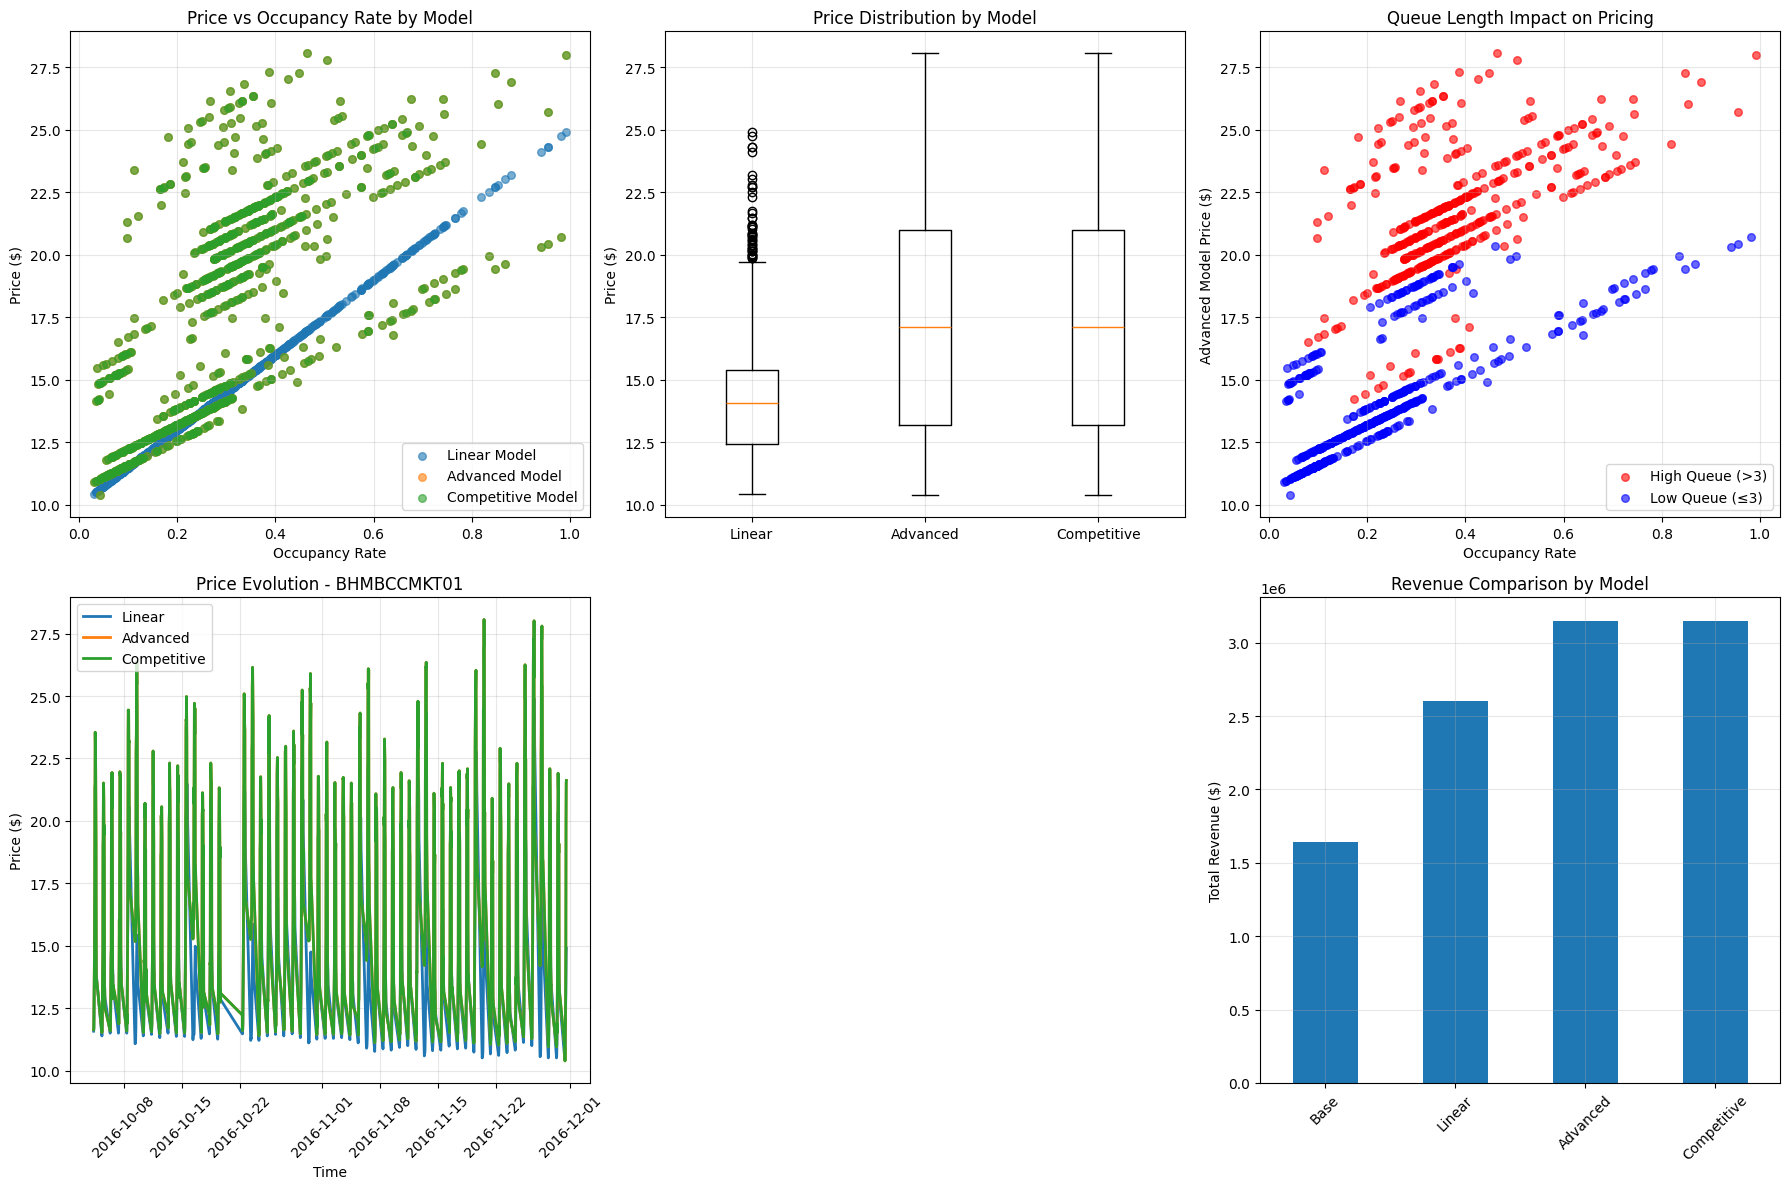


Revenue Comparison:
                      0
Base         1644760.00
Linear       2599984.94
Advanced     3150378.80
Competitive  3150378.80


In [ ]:
# Create comprehensive visualizations
def create_pricing_analysis_plots(results_df):
    """
    Create various plots to analyze pricing model performance
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Plot 1: Price comparison across models
    axes[0, 0].scatter(results_df['OccupancyRate'], results_df['LinearPrice'],
                      alpha=0.6, label='Linear Model', s=30)
    axes[0, 0].scatter(results_df['OccupancyRate'], results_df['AdvancedPrice'],
                      alpha=0.6, label='Advanced Model', s=30)
    axes[0, 0].scatter(results_df['OccupancyRate'], results_df['CompetitivePrice'],
                      alpha=0.6, label='Competitive Model', s=30)
    axes[0, 0].set_xlabel('Occupancy Rate')
    axes[0, 0].set_ylabel('Price ($)')
    axes[0, 0].set_title('Price vs Occupancy Rate by Model')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Plot 2: Price distribution by model
    price_data = [results_df['LinearPrice'], results_df['AdvancedPrice'],
                  results_df['CompetitivePrice']]
    axes[0, 1].boxplot(price_data, labels=['Linear', 'Advanced', 'Competitive'])
    axes[0, 1].set_ylabel('Price ($)')
    axes[0, 1].set_title('Price Distribution by Model')
    axes[0, 1].grid(True, alpha=0.3)

    # Plot 3: Queue length impact on pricing
    high_queue = results_df[results_df['QueueLength'] > 3]
    low_queue = results_df[results_df['QueueLength'] <= 3]

    axes[0, 2].scatter(high_queue['OccupancyRate'], high_queue['AdvancedPrice'],
                      alpha=0.6, label='High Queue (>3)', color='red', s=30)
    axes[0, 2].scatter(low_queue['OccupancyRate'], low_queue['AdvancedPrice'],
                      alpha=0.6, label='Low Queue (≤3)', color='blue', s=30)
    axes[0, 2].set_xlabel('Occupancy Rate')
    axes[0, 2].set_ylabel('Advanced Model Price ($)')
    axes[0, 2].set_title('Queue Length Impact on Pricing')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)

    # Plot 4: Time series for a specific location
    location_data = results_df[results_df['SystemCodeNumber'] == results_df['SystemCodeNumber'].iloc[0]]
    location_data = location_data.sort_values('DateTime')

    axes[1, 0].plot(location_data['DateTime'], location_data['LinearPrice'],
                   label='Linear', linewidth=2)
    axes[1, 0].plot(location_data['DateTime'], location_data['AdvancedPrice'],
                   label='Advanced', linewidth=2)
    axes[1, 0].plot(location_data['DateTime'], location_data['CompetitivePrice'],
                   label='Competitive', linewidth=2)
    axes[1, 0].set_xlabel('Time')
    axes[1, 0].set_ylabel('Price ($)')
    axes[1, 0].set_title(f'Price Evolution - {location_data["SystemCodeNumber"].iloc[0]}')
    axes[1, 0].legend()
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3)

    # Hide the middle plot (position [1,1])
    axes[1, 1].axis('off')

    # Plot 6: Revenue potential comparison (moved to position [1,2])
    # Assume base revenue with static pricing
    base_revenue = results_df['Occupancy'] * 10  # $10 flat rate
    linear_revenue = results_df['Occupancy'] * results_df['LinearPrice']
    advanced_revenue = results_df['Occupancy'] * results_df['AdvancedPrice']
    competitive_revenue = results_df['Occupancy'] * results_df['CompetitivePrice']

    revenue_comparison = pd.DataFrame({
        'Base': base_revenue.sum(),
        'Linear': linear_revenue.sum(),
        'Advanced': advanced_revenue.sum(),
        'Competitive': competitive_revenue.sum()
    }, index=[0])

    revenue_comparison.T.plot(kind='bar', ax=axes[1, 2], legend=False)
    axes[1, 2].set_ylabel('Total Revenue ($)')
    axes[1, 2].set_title('Revenue Comparison by Model')
    axes[1, 2].tick_params(axis='x', rotation=45)
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return revenue_comparison

# Create analysis plots
revenue_comparison = create_pricing_analysis_plots(pricing_results)
print("\nRevenue Comparison:")
print(revenue_comparison.T)
